In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import random

import time

In [2]:
import sys

print(sys.version)

3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]


In [3]:
import tensorflow as tf

print(tf.__version__)

2.14.0


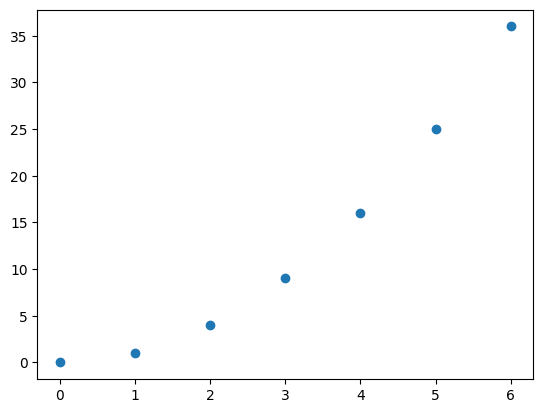

In [4]:
import matplotlib.pyplot as plt
import numpy as np

figure = plt.figure()
axes = figure.add_subplot()

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([0, 1, 4, 9, 16, 25, 36])

axes.scatter(x, y)

In [5]:
iris = load_iris()

sepal_length = iris.data[0:100, 0]
petal_length = iris.data[0:100, 2]
flower_type = iris.target[0:100]

x = np.column_stack((sepal_length, petal_length))
y = flower_type

tf.keras.utils.set_random_seed(5)

np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model = Sequential()
model.add(Dense(6, activation='relu', input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error')

model.fit(x, y, epochs=40)

Epoch 1/40
4/4 [==============================] - 0s 1ms/step - loss: 0.2402
Epoch 2/40
4/4 [==============================] - 0s 3ms/step - loss: 0.2344
Epoch 3/40
4/4 [==============================] - 0s 891us/step - loss: 0.2316
Epoch 4/40
4/4 [==============================] - 0s 0s/step - loss: 0.2289
Epoch 5/40
4/4 [==============================] - 0s 5ms/step - loss: 0.2274
Epoch 6/40
4/4 [==============================] - 0s 1ms/step - loss: 0.2257
Epoch 7/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2233
Epoch 8/40
4/4 [==============================] - 0s 0s/step - loss: 0.2217
Epoch 9/40
4/4 [==============================] - 0s 1ms/step - loss: 0.2205
Epoch 10/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2175
Epoch 11/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2157
Epoch 12/40
4/4 [==============================] - 0s 0s/step - loss: 0.2133
Epoch 13/40
4/4 [==============================] - 0s 2ms/step - loss: 0.2

In [6]:
print(model.predict([[6.3, 4.9], [4.9, 1.4]]))
print(model.predict([[6.3, 4.9]]))
print(model.predict([[4.9, 1.4]]))

1/1 [==============================] - 0s 77ms/step
[[0.7515563 ]
 [0.42488188]]
1/1 [==============================] - 0s 24ms/step
[[0.7515562]]
1/1 [==============================] - 0s 19ms/step
[[0.42488188]]


In [7]:
subjects_to_predict = np.column_stack((sepal_length, petal_length))

for i in range(0, 10):
    subjects_to_predict = np.concatenate((subjects_to_predict, subjects_to_predict))

print(f"There are a total of {len(subjects_to_predict):,} predictions to make")

There are a total of 102,400 predictions to make


In [8]:
print("Making predictions with a single statement and passing all data in a matrix")
timestamp_before = time.time_ns()
model.predict(subjects_to_predict, verbose=0)
timestamp_after = time.time_ns()

elapsed_time = timestamp_after - timestamp_before
print(f"It took {elapsed_time / 1_000_000_000} seconds to complete", sep='')

Making predictions with a single statement and passing all data in a matrix
It took $2.734109 seconds to complete


In [9]:
print("Making predictions with several statements passing subjects individually")

timestamp_before = time.time_ns()

for subject in subjects_to_predict:
    model.predict([subject.tolist()], verbose=0)

timestamp_after = time.time_ns()

elapsed_time = timestamp_after - timestamp_before
print(f"It took ${elapsed_time / 1_000_000_000} seconds to complete", sep='')

Making predictions with several statements passing subjects individually


KeyboardInterrupt: 